В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [1]:
def write_answer_to_file(answer,filename):
    with open(filename,'w') as f_out:
        f_out.write(str(round(answer,3)))

1. Загрузите данные из файла advertising.csv в объект pandas DataFrame. Источник данных.

In [2]:
import pandas as pd
adver_data=pd.read_csv('advertising.csv')

In [3]:
adver_data.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


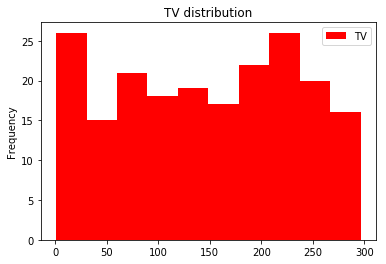

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
adver_data.plot(y="TV",kind="hist",color="red",title="TV distribution")

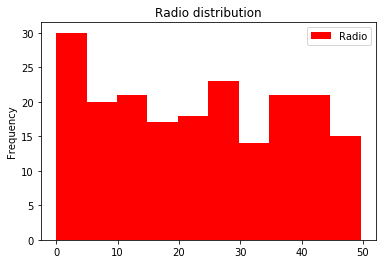

In [73]:
adver_data.plot(y="Radio",kind="hist",color="red",title="Radio distribution")

In [5]:
adver_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
adver_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Создайте массивы NumPy X из столбцов TV, Radio и Newspaper и y - из столбца Sales. Используйте атрибут values объекта pandas DataFrame.

In [7]:
X=adver_data[["TV","Radio","Newspaper"]].values
y=adver_data[["Sales"]].values

Отмасштабируйте столбцы матрицы X, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.

In [8]:
import numpy as np
means,stds=np.mean(X,axis=0),np.std(X,axis=0)

In [9]:
X=(X-means)/stds

Добавьте к матрице X столбец из единиц, используя методы hstack, ones и reshape библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент w0w0 линейной регрессии.

In [10]:
onesvector=np.ones((X.shape[0],1))
X=np.hstack((X,onesvector))

2. Реализуйте функцию mserror - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series y (значения целевого признака) и y_pred (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.

In [11]:
def mserror(y,y_pred):
    return round((sum((y - y_pred)**2)[0])/float(y.shape[0]), 3)

Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.

In [13]:
#median=np.median(adver_data[["Sales"]])
eye = np.array([np.median(y)]*y.shape[0]).reshape((y.shape[0], 1))
answer1 = mserror(y, eye)
print(answer1)
write_answer_to_file(answer1, '1.txt')

28.346


252.00125


3. Реализуйте функцию normal_equation, которая по заданным матрицам (массивам NumPy) X и y вычисляет вектор весов ww согласно нормальному уравнению линейной регрессии.

In [14]:
def normal_equation(X,y):
    return np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), y)

In [15]:
norm_eq_weights=normal_equation(X,y)
print(norm_eq_weights)

[[  3.91925365]
 [  2.79206274]
 [ -0.02253861]
 [ 14.0225    ]]


In [16]:
mean_values=np.array([0,0,0,1]).transpose()
fit=mean_values.dot(norm_eq_weights)
answer2=fit[0]
write_answer_to_file(answer2,"2.txt")

4. Напишите функцию linear_prediction, которая принимает на вход матрицу X и вектор весов линейной модели w, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы X с весами w.

In [18]:
def linear_prediction(X,w):
     return np.dot(X, w)

Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.

In [20]:
answer3 = mserror(y, linear_prediction(X, norm_eq_weights))
print(answer3)
write_answer_to_file(answer3, '3.txt')

2.784


5. Напишите функцию stochastic_gradient_step, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу X, вектора y и w, число train_ind - индекс объекта обучающей выборки (строки матрицы X), по которому считается изменение весов, а также число ηη (eta) - шаг градиентного спуска (по умолчанию eta=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.

In [21]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    x_k = X[train_ind, :]
    y_k = y[train_ind]
    y_pred = np.dot(x_k, w)
    l = X.shape[0]
    return w + (2*eta/l)*(y_k - y_pred)*x_k

6. Напишите функцию stochastic_gradient_descent, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:

    X - матрица, соответствующая обучающей выборке
    y - вектор значений целевого признака
    w_init - вектор начальных весов модели
    eta - шаг градиентного спуска (по умолчанию 0.01)
    max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
    max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска, при котором алгоритм прекращает работу (по умолчанию 1e-8)
    seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
    verbose - флаг печати информации (например, для отладки, по умолчанию False)

На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов ww, а также вектор (список) ошибок.


In [22]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом.
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
       
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
       
        # Ваш код здесь
        old_w = w
        w = stochastic_gradient_step(X, y, w, random_ind, eta=eta)
        weight_dist = np.linalg.norm(w - old_w)
        errors.append(mserror(y, np.dot(X, w)))
        iter_num += 1
       
        if iter_num % 10000 == 0 and verbose:
            print "Iteration: ", iter_num
       
    return w, errors

 Запустите 105105 итераций стохастического градиентного спуска. Укажите вектор начальных весов w_init, состоящий из нулей. Оставьте параметры eta и seed равными их значениям по умолчанию (eta=0.01, seed=42 - это важно для проверки ответов).

In [23]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X,y,np.array([0.0,0.0,0.0,0.0]),max_iter=10**5)

Wall time: 2min 2s


Посмотрим на вектор весов, к которому сошелся метод.

Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.

Populating the interactive namespace from numpy and matplotlib


C:\Users\dim\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['eye']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0,0.5,u'MSE')

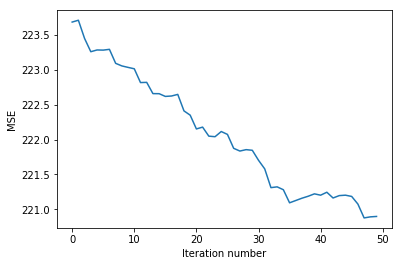

In [24]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

Теперь посмотрим на зависимость ошибки от номера итерации для 105105 итераций стохастического градиентного спуска. Видим, что алгоритм сходится.

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,u'MSE')

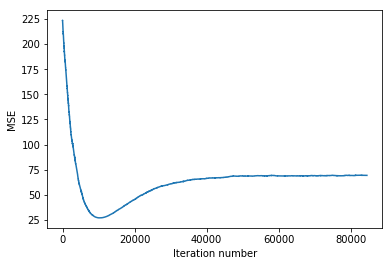

In [25]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

Посмотрим на вектор весов, к которому сошелся метод.

In [26]:
stoch_grad_desc_weights

array([  3.91069256e+00,   2.78209808e+00,  -8.10462217e-03,
         1.40190566e+01])

Посмотрим на среднеквадратичную ошибку на последней итерации.

In [27]:
stoch_errors_by_iter[-1]

69.409

Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.

In [30]:
print sum((y - np.dot(X, stoch_grad_desc_weights).reshape((y.shape[0], 1)))**2)/float(y.shape[0])
answer4 = round(np.mean((y - np.dot(X, stoch_grad_desc_weights).reshape((y.shape[0], 1)))**2), 3)
print(answer4)
write_answer_to_file(answer4, '4.txt')

2.78441258841
2.784


94.856775441415408